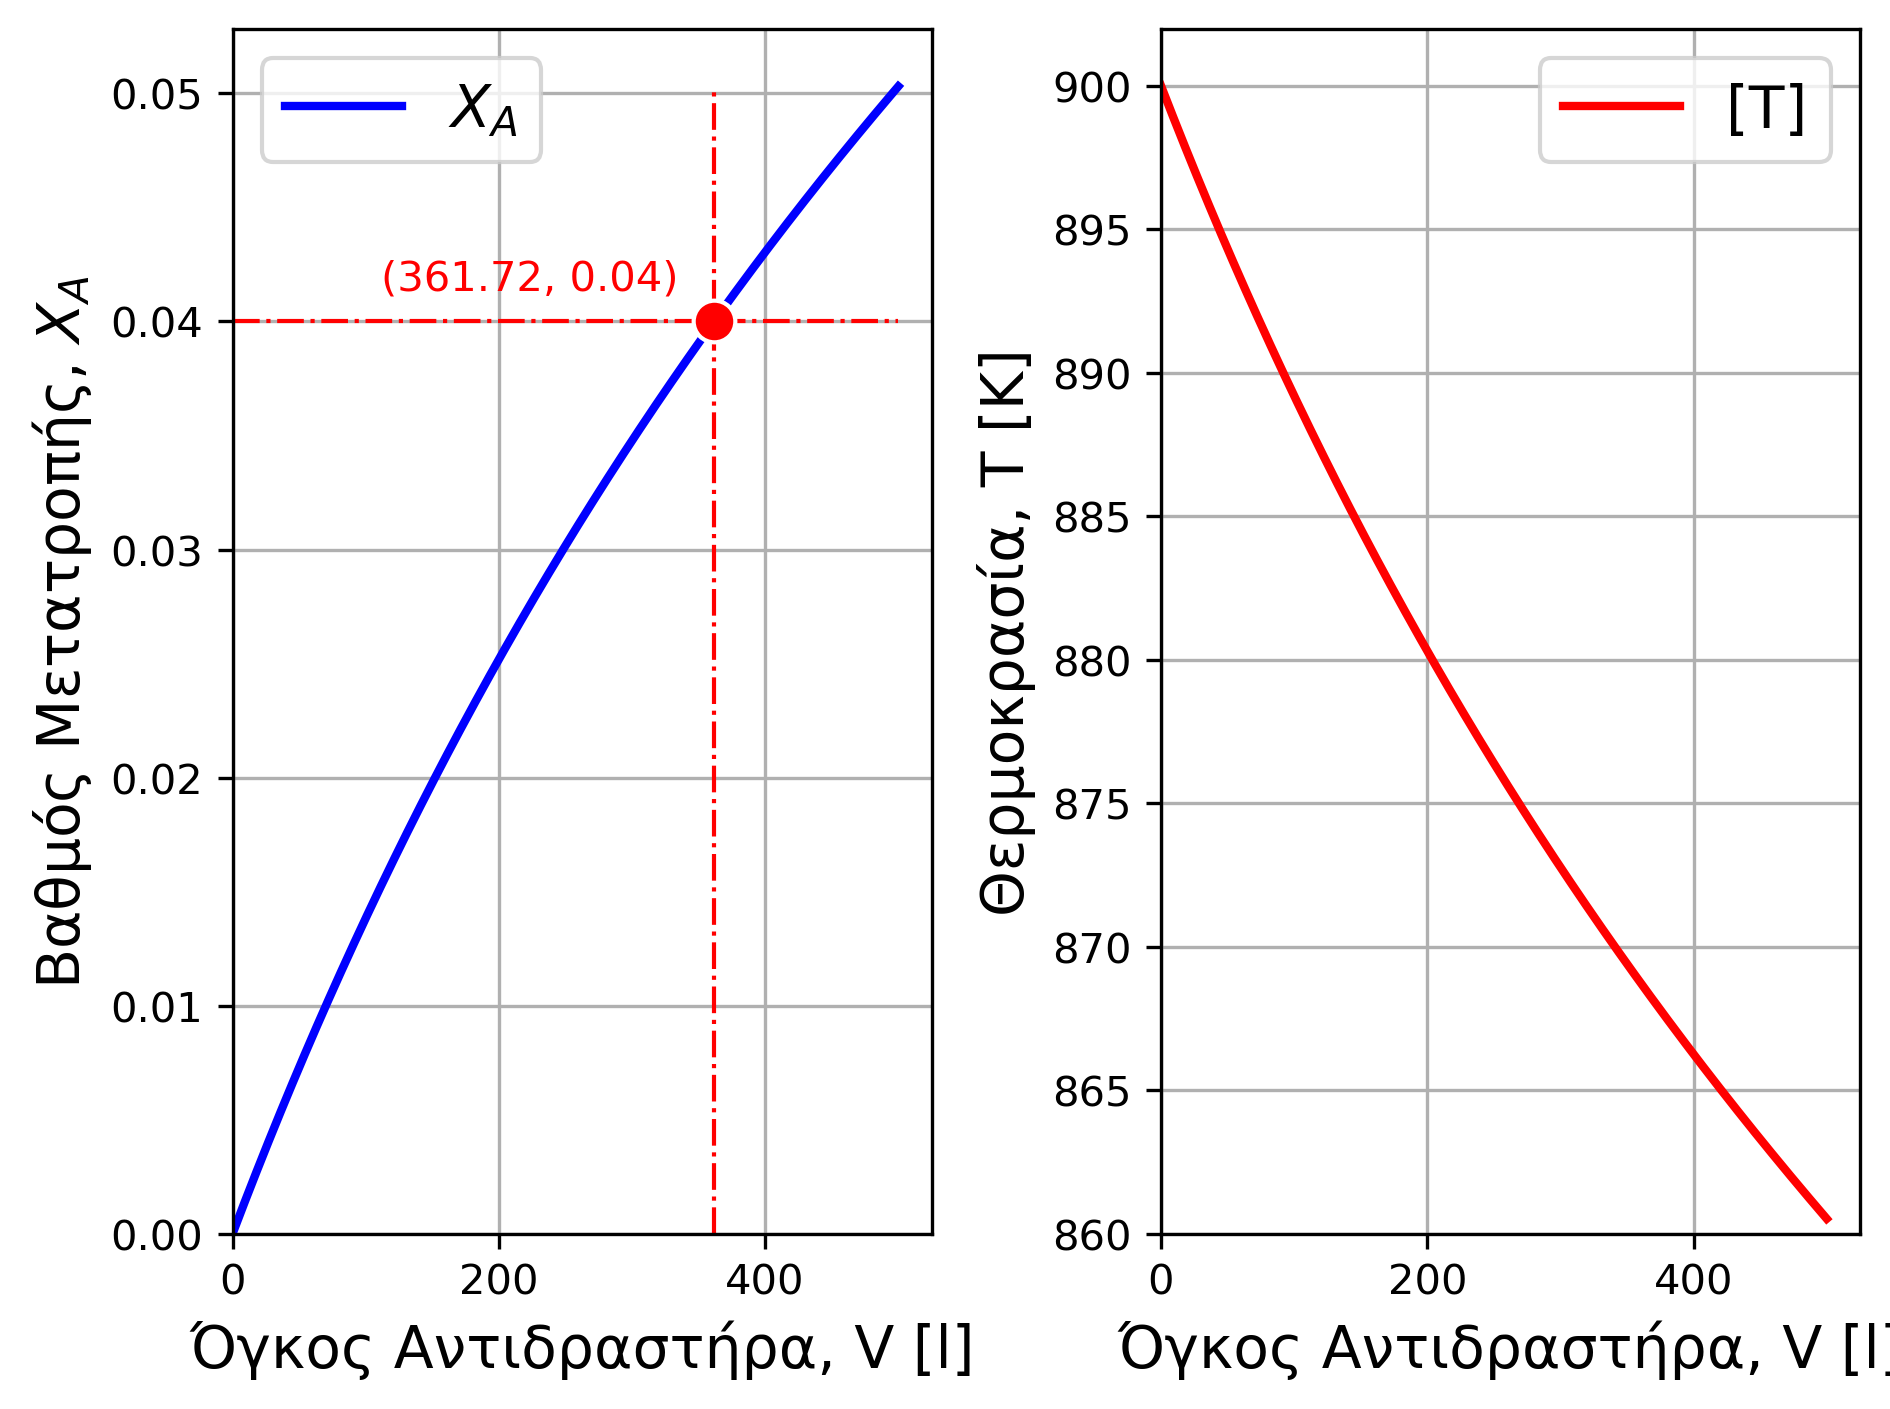

In [14]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the model function
def SXA_I_Example_8p1(V, x):
    """
    Numerical Integration of adiabatic PFR
    """
    # Model Parameters
    k0 = np.exp(22.769)         # Frequency factor [L/mol/h]
    E_R = 16504                 # Activation energy (E) over R [K]
    FAo = 400                   # Molar flowrate [mol/h]
    CpA = 6                     # Cp [cal/mol/K]
    CpB = 6                     # Cp [cal/mol/K]
    CpD = 10                    # Cp [cal/mol/K]
    CpI = 5                     # Cp [cal/mol/K]
    DHro = 12500                # Enthalpy of reaction at 300K [cal/mol]

    # Extract state variables
    Xa = x[0]                   # Conversion
    T = x[1]                    # Temperature

    # Rate Equations
    k = k0 * np.exp(-E_R / T)
    Q = T * 0.0164 * (1000 - 400 * Xa)
    R_rate = k * FAo**2 * (1 - Xa)**2 / Q**2
    DHr = DHro + (CpD - CpA - CpB) * (T - 300)
    FA = FAo - FAo * Xa
    FB = FAo - FAo * Xa
    FD = FAo * Xa
    FI = 200

    Ftot_times_Cp = FA * CpA + FB * CpB + FD * CpD + FI * CpI

    # Differential Equations
    dXa_dV = R_rate / FAo                   # d[Xa]/dV
    dT_dV = -DHr * R_rate / Ftot_times_Cp   # d[T]/dV

    return [dXa_dV, dT_dV]

# Integration scale
vspan = (0, 500)  # Integration interval
v_eval = np.linspace(vspan[0], vspan[1], 500) # Evaluation points
# Initial Conditions
Init_Cond = [0, 900]  # [Conversion, Temperature]

# Solve the system of equations using solve_ivp
sol = solve_ivp(SXA_I_Example_8p1, vspan, Init_Cond, method='RK45', t_eval=v_eval)  # Evaluation points

# Extract results
V = sol.t         # Integration points
Xa = sol.y[0]     # Conversion
T = sol.y[1]      # Temperature

# Find the Reactor Volume for which XA = 0.04
Xa_index = np.where(np.logical_and(Xa >= 0.04, Xa <= 0.041))[0][0]
Xaf = Xa[Xa_index]
Xav = V[Xa_index]

# Set up high-resolution plotting
plt.figure(dpi=300)

# Conversion plot
plt.subplot(1, 2, 1)
plt.plot(V, Xa, 'b-', linewidth=2)
plt.grid(True)
plt.legend(['$X_A$'], fontsize=14)
plt.xlabel('Όγκος Αντιδραστήρα, V [l]', fontsize=14)
plt.ylabel('Βαθμός Μετατροπής, $X_A$', fontsize=14)
plt.xlim(left=0)  # X-axis starts at 0
plt.ylim(bottom=0)  # Y-axis starts at 0

# Mark and label intersection points
plt.scatter(Xav, Xaf, color='red', s=100, edgecolor='white', zorder=5)
plt.text(Xav-250, Xaf+0.001, f'({Xav:.2f}, {Xaf:.2f})', color='red', fontsize=10, ha='left', va='bottom')

# Plot red dashed lines to mark Xav and Xaf
plt.plot([Xav, Xav], [0, np.amax(Xa)], 'r-.', lw=1)  # Vertical line at Rv
plt.plot([0, np.amax(V)], [Xaf, Xaf], 'r-.', lw=1)  # Horizontal line at Rf


# Temperature plot
plt.subplot(1, 2, 2)
plt.plot(V, T, 'r-', linewidth=2)
plt.grid(True)
plt.legend(['[T]'], fontsize=14)
plt.xlabel('Όγκος Αντιδραστήρα, V [l]', fontsize=14)
plt.ylabel('Θερμοκρασία, Τ [K]', fontsize=14)
plt.xlim(left=0)  # X-axis starts at 0
plt.ylim(bottom=860)  # Y-axis starts at 860

plt.tight_layout()
plt.show()
